In [1]:
from marubatsu import Marubatsu, NpBoard
import numpy as np

mb = Marubatsu(boardclass=NpBoard)
mb.cmove(1, 1)
mb.cmove(0, 0)
mb.cmove(1, 0)
print(mb)
for _ in range(3):
    mb.board.board = np.rot90(mb.board.board)
    print(mb)
mb.board.board = np.fliplr(mb.board.board)
print(mb)
for _ in range(3):
    mb.board.board = np.rot90(mb.board.board)
    print(mb)

Turn x
xO.
.o.
...

Turn x
..x
.oo
...

Turn x
...
.o.
.ox

Turn x
...
oo.
x..

Turn x
x..
oo.
...

Turn x
.Ox
.o.
...

Turn x
...
.oo
..x

Turn x
...
.o.
xo.



In [2]:
print(mb)
print(mb.board.board)

Turn x
...
.o.
xo.

[['.' '.' 'x']
 ['.' 'o' 'o']
 ['.' '.' '.']]


In [3]:
print(mb.board.board)
print(np.rot90(mb.board.board))

[['.' '.' 'x']
 ['.' 'o' 'o']
 ['.' '.' '.']]
[['x' 'o' '.']
 ['.' 'o' '.']
 ['.' '.' '.']]


In [4]:
mb = Marubatsu(boardclass=NpBoard)
mb.cmove(1, 1)
mb.cmove(0, 0)
mb.cmove(1, 0)
print(mb)
x, y = mb.board.move_to_xy(mb.last_move)
for i in range(7):
    if i != 3:
        mb.board.board = np.rot90(mb.board.board)
        x, y = mb.BOARD_SIZE - 1 - y, x
    else:
        mb.board.board = np.fliplr(mb.board.board)
        y = mb.BOARD_SIZE - 1 - y        
    mb.last_move = mb.board.xy_to_move(x, y)
    print(mb)

Turn x
xO.
.o.
...

Turn x
..x
.oO
...

Turn x
...
.o.
.Ox

Turn x
...
Oo.
x..

Turn x
x..
Oo.
...

Turn x
.Ox
.o.
...

Turn x
...
.oO
..x

Turn x
...
.o.
xO.



In [5]:
from marubatsu import Board
from abc import abstractmethod

@abstractmethod
def calc_same_boardtexts(self, move=None):
    pass

Board.calc_same_boardtexts = calc_same_boardtexts

In [6]:
from marubatsu import ListBoard

def calc_same_boardtexts(self, move=None):
    data = [ [ 0,  0,  1, 1, -1,  0,  1,  0, -1, 0,  1,  0],
             [ 1, -1,  0, 1,  0, -1] * 2,
             [ 1,  0, -1, 0,  1,  0,  0,  0,  1, 1, -1,  0],
             [ 1, -1,  0, 0,  0,  1] * 2,
             [ 0,  1,  0, 1,  0, -1] * 2,
             [ 1,  0, -1, 1, -1,  0] * 2,
             [ 0,  0,  1, 0,  1,  0] * 2, ]
    if move is None:
        boardtexts = set([self.board_to_str()])
    else:
        boardtexts = { self.board_to_str(): move }
    for xa, xb, xc, ya, yb, yc, xa2, xb2, xc2, ya2, yb2, yc2 in data:
        txt = ""
        for x in range(self.BOARD_SIZE):
            for y in range(self.BOARD_SIZE):
                txt += self.getmark(xa * (self.BOARD_SIZE - 1) + xb * x + xc * y, ya * (self.BOARD_SIZE - 1) + yb * x + yc * y)
        if move is None:
            boardtexts.add(txt)
        else:
            x, y = self.move_to_xy(move)
            x, y = xa2 * (self.BOARD_SIZE - 1) + xb2 * x + xc2 * y, ya2 * (self.BOARD_SIZE - 1) + yb2 * x + yc2 * y
            boardtexts[txt] = self.xy_to_move(x, y)
    return boardtexts

ListBoard.calc_same_boardtexts = calc_same_boardtexts

In [7]:
from pprint import pprint
from util import calc_same_boardtexts

mb = Marubatsu()
mb.cmove(1, 1)
mb.cmove(0, 0)
mb.cmove(1, 0)
pprint(mb.board.calc_same_boardtexts())
print(mb.board.calc_same_boardtexts() == calc_same_boardtexts(mb))
pprint(mb.board.calc_same_boardtexts(mb.last_move))
print(mb.board.calc_same_boardtexts(mb.last_move) == calc_same_boardtexts(mb, mb.last_move))

{'....o..ox',
 '....o.xo.',
 '....oo..x',
 '...oo.x..',
 '..x.oo...',
 '.ox.o....',
 'x..oo....',
 'xo..o....'}
True
{'....o..ox': (2, 1),
 '....o.xo.': (2, 1),
 '....oo..x': (1, 2),
 '...oo.x..': (1, 0),
 '..x.oo...': (1, 2),
 '.ox.o....': (0, 1),
 'x..oo....': (1, 0),
 'xo..o....': (0, 1)}
True


In [8]:
from marubatsu import List1dBoard

mb = Marubatsu(boardclass=List1dBoard)
mb.cmove(1, 1)
mb.cmove(0, 0)
mb.cmove(1, 0)
pprint(mb.board.calc_same_boardtexts())
print(mb.board.calc_same_boardtexts() == calc_same_boardtexts(mb))
pprint(mb.board.calc_same_boardtexts(mb.last_move))
print(mb.board.calc_same_boardtexts(mb.last_move) == calc_same_boardtexts(mb, mb.last_move))

{'....o..ox',
 '....o.xo.',
 '....oo..x',
 '...oo.x..',
 '..x.oo...',
 '.ox.o....',
 'x..oo....',
 'xo..o....'}
True
{'....o..ox': 7,
 '....o.xo.': 7,
 '....oo..x': 5,
 '...oo.x..': 3,
 '..x.oo...': 5,
 '.ox.o....': 1,
 'x..oo....': 3,
 'xo..o....': 1}
True


In [9]:
def calc_same_boardtexts(self, move=None):
    if move is None:
        boardtexts = set([self.board_to_str()])
    else:
        boardtexts = { self.board_to_str(): move }
    boardorig = self.board
    if move is not None:
        x, y = self.move_to_xy(move)
    for i in range(7):
        if i != 3:
            self.board = np.rot90(self.board)
        else:
            self.board = np.fliplr(self.board)
        txt = self.board_to_str()
        if move is None:
            boardtexts.add(txt)
        else:
            if i == 3:
                y = self.BOARD_SIZE - y - 1
            else:
                x, y = self.BOARD_SIZE - y - 1, x
            boardtexts[txt] = self.xy_to_move(x, y)
    self.board = boardorig
    return boardtexts

NpBoard.calc_same_boardtexts = calc_same_boardtexts

In [10]:
from util import calc_same_boardtexts

mb = Marubatsu(boardclass=NpBoard)
mb.cmove(1, 1)
mb.cmove(0, 0)
mb.cmove(1, 0)
pprint(mb.board.calc_same_boardtexts())
print(mb.board.calc_same_boardtexts() == calc_same_boardtexts(mb))
pprint(mb.board.calc_same_boardtexts(mb.last_move))
print(mb.board.calc_same_boardtexts(mb.last_move) == calc_same_boardtexts(mb, mb.last_move))

{'....o..ox',
 '....o.xo.',
 '....oo..x',
 '...oo.x..',
 '..x.oo...',
 '.ox.o....',
 'x..oo....',
 'xo..o....'}
True
{'....o..ox': (2, 1),
 '....o.xo.': (2, 1),
 '....oo..x': (1, 2),
 '...oo.x..': (1, 0),
 '..x.oo...': (1, 2),
 '.ox.o....': (0, 1),
 'x..oo....': (1, 0),
 'xo..o....': (0, 1)}
True


In [11]:
from ai import ai_by_mmscore, dprint

@ai_by_mmscore
def ai_abs_dls(mb, debug=False, timelimit_pc=None, maxdepth=1,
               eval_func=None, eval_params={}, use_tt=False,
               tt=None, tt_for_mo=None):
    count = 0
    def ab_search(mborig, depth, tt, alpha=float("-inf"), beta=float("inf")):
        nonlocal count
        if timelimit_pc is not None and perf_counter() >= timelimit_pc:
            raise RuntimeError("time out")
        
        count += 1
        if mborig.status != Marubatsu.PLAYING or depth == maxdepth:
            return eval_func(mborig, calc_score=True, **eval_params)
        
        if use_tt:
            boardtxt = mborig.board_to_str()
            if boardtxt in tt:
                lower_bound, upper_bound, _ = tt[boardtxt]
                if lower_bound == upper_bound:
                    return lower_bound
                elif upper_bound <= alpha:
                    return upper_bound
                elif beta <= lower_bound:
                    return lower_bound
                else:
                    alpha = max(alpha, lower_bound)
                    beta = min(beta, upper_bound)
            else:
                lower_bound = min_score
                upper_bound = max_score
        
        alphaorig = alpha
        betaorig = beta

        legal_moves = mborig.calc_legal_moves()
        if tt_for_mo is not None:
            if not use_tt:            
                boardtxt = mborig.board_to_str()
            if boardtxt in tt_for_mo:
                _, _, bestmove = tt_for_mo[boardtxt]
                index = legal_moves.index(bestmove)
                legal_moves[0], legal_moves[index] = legal_moves[index], legal_moves[0]        
        if mborig.turn == Marubatsu.CIRCLE:
            score = float("-inf")
            for move in legal_moves:
                mborig.move(move)
                abscore = ab_search(mborig, depth + 1, tt, alpha, beta)
                mborig.unmove()
                if abscore > score:
                    bestmove = move
                score = max(score, abscore)
                if score >= beta:
                    break
                alpha = max(alpha, score)
        else:
            score = float("inf")
            for move in legal_moves:
                mborig.move(move)
                abscore = ab_search(mborig, depth + 1, tt, alpha, beta)
                mborig.unmove()
                if abscore < score:
                    bestmove = move
                score = min(score, abscore)
                if score <= alpha:
                    break
                beta = min(beta, score)   
            
        if use_tt:
            boardtxtlist = mborig.board.calc_same_boardtexts(bestmove)
            if score <= alphaorig:
                upper_bound = score
            elif score < betaorig:
                lower_bound = score
                upper_bound = score
            else:
                lower_bound = score
            for boardtxt, move in boardtxtlist.items():
                tt[boardtxt] = (lower_bound, upper_bound, move)
        return score
                
    min_score = float("-inf")
    max_score = float("inf")
    
    if tt is None:
        tt = {}
    score = ab_search(mb, depth=0, tt=tt, alpha=min_score, beta=max_score)
    dprint(debug, "count =", count)
    return score, count

In [12]:
from ai import ai14s

boardclass = NpBoard
eval_params = {"minimax": True}
for count_linemark in [False, True]:
    print(f"boardclass: {boardclass.__name__}, count_linemark {count_linemark}")
    mb = Marubatsu(boardclass=NpBoard, count_linemark=count_linemark)
    %timeit ai_abs_dls(mb, eval_func=ai14s, eval_params=eval_params, use_tt=True, maxdepth=8)

boardclass: NpBoard, count_linemark False
49.2 ms ± 277 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
boardclass: NpBoard, count_linemark True
43.6 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
def calc_same_boardtexts(mb, move=None):
    data = [ [ 0,  0,  1, 1, -1,  0,  1,  0, -1, 0,  1,  0],
             [ 1, -1,  0, 1,  0, -1] * 2,
             [ 1,  0, -1, 0,  1,  0,  0,  0,  1, 1, -1,  0],
             [ 1, -1,  0, 0,  0,  1] * 2,
             [ 0,  1,  0, 1,  0, -1] * 2,
             [ 1,  0, -1, 1, -1,  0] * 2,
             [ 0,  0,  1, 0,  1,  0] * 2, ]
    if move is None:
        boardtexts = set([mb.board_to_str()])
    else:
        boardtexts = { mb.board_to_str(): move }
    for xa, xb, xc, ya, yb, yc, xa2, xb2, xc2, ya2, yb2, yc2 in data:
        txt = ""
        for x in range(mb.BOARD_SIZE):
            for y in range(mb.BOARD_SIZE):
                txt += mb.board.getmark(xa * (mb.board.BOARD_SIZE -1) + xb * x + xc * y, 
                                        ya * (mb.board.BOARD_SIZE -1) + yb * x + yc * y)
        if move is None:
            boardtexts.add(txt)
        else:
            x, y = mb.board.move_to_xy(move)
            x, y = xa2 * (mb.board.BOARD_SIZE -1) + xb2 * x + xc2 * y, ya2 * (mb.board.BOARD_SIZE -1) + yb2 * x + yc2 * y
            boardtexts[txt] = mb.board.xy_to_move(x, y)
    return boardtexts

Turn o
oxo
X..
...

True
  NpBoard の場合の処理時間:     62 μs
  util.py の場合の処理時間:     39 μs
Turn x
oxox
O...
....
....

True
  NpBoard の場合の処理時間:     62 μs
  util.py の場合の処理時間:     65 μs
Turn o
oxoxo
X....
.....
.....
.....

True
  NpBoard の場合の処理時間:     65 μs
  util.py の場合の処理時間:     99 μs
Turn x
oxoxox
O.....
......
......
......
......

True
  NpBoard の場合の処理時間:     64 μs
  util.py の場合の処理時間:    138 μs
Turn o
oxoxoxo
X......
.......
.......
.......
.......
.......

True
  NpBoard の場合の処理時間:     66 μs
  util.py の場合の処理時間:    183 μs
Turn x
oxoxoxox
O.......
........
........
........
........
........
........

True
  NpBoard の場合の処理時間:     68 μs
  util.py の場合の処理時間:    235 μs
Turn o
oxoxoxoxo
X........
.........
.........
.........
.........
.........
.........
.........

True
  NpBoard の場合の処理時間:     72 μs
  util.py の場合の処理時間:    304 μs
Turn x
oxoxoxoxox
O.........
..........
..........
..........
..........
..........
..........
..........
..........

True
  NpBoard の場合の処理時間:     74 μs
  util.py の場合の

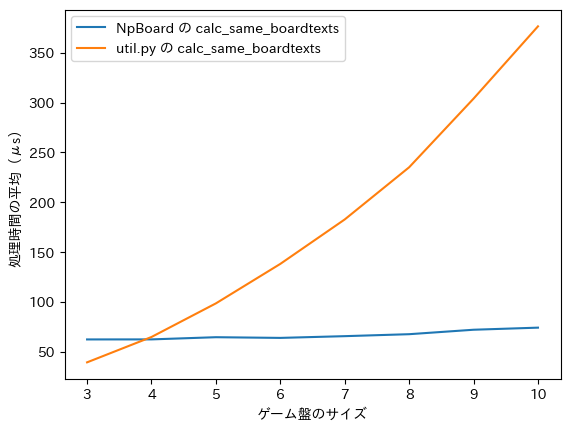

In [15]:
import timeit
import matplotlib.pyplot as plt
import japanize_matplotlib
from statistics import mean

sizelist = []
nptime = []
utiltime = []
number = 10000
repeat = 7
for size in range(3, 11):
    sizelist.append(size)
    mb = Marubatsu(boardclass=NpBoard, board_size=size)
    for x in range(size):
        mb.cmove(x, 0)
    mb.cmove(0, 1)
    print(mb)
    bt1 = mb.board.calc_same_boardtexts()
    bt2 = calc_same_boardtexts(mb)
    print(bt1==bt2)

    stmt = "mb.board.calc_same_boardtexts()"
    result = timeit.repeat(stmt=stmt, number=number, repeat=repeat, globals=globals())
    time = mean(result) / number * 1e6
    nptime.append(time)    
    print(f"  NpBoard の場合の処理時間:    {time:3.0f} μs")
    stmt = "calc_same_boardtexts(mb)"
    result = timeit.repeat(stmt=stmt, number=number, repeat=repeat, globals=globals())
    time = mean(result) / number * 1e6
    utiltime.append(time)    
    print(f"  util.py の場合の処理時間:    {time:3.0f} μs")
    
plt.plot(sizelist, nptime, label="NpBoard の calc_same_boardtexts")
plt.plot(sizelist, utiltime, label="util.py の calc_same_boardtexts")
plt.xlabel("ゲーム盤のサイズ")
plt.ylabel("処理時間の平均（μs）")
plt.legend()
